# Loading data 

In [1]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

In [2]:
def gen_labels(im_name, pat1, pat2):
    '''
    Parameters
    ----------
    im_name : Str
        The image file name.
    pat1 : Str
        A string pattern in the filename for 1st class, e.g "Mel"
    pat2 : Str
        A string pattern in the filename 2nd class, e.g, "Nev" 
    Returns
    -------
    Label : Numpy array        
        Class label of the filename name based on its pattern.
    '''
    if pat1 in im_name:
        label = np.array([0])
    elif pat2 in im_name:
        label = np.array([1])
    return label


def get_data(data_path, data_list, img_h, img_w):
    """
    Parameters
    ----------
    train_data_path : Str
        Path to the data directory
    train_list : List
        A list containing the name of the images.
    img_h : Int
        image height to be resized to.
    img_w : Int
        image width to be resized to.    
    Returns
    -------
    img_labels : Nested List
        A nested list containing the loaded images along with their
        correcponding labels.
    """
    img_labels = []       
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')]) 
        
        if item[0] % 100 == 0:
             print('Reading: {0}/{1}  of train images'.format(item[0], len(data_list)))
             
    shuffle(img_labels)
    return img_labels


def get_data_arrays(nested_list, img_h, img_w):
    """
    Parameters
    ----------
    nested_list : nested list
        nested list of image arrays with corresponding class labels.
    img_h : Int
        Image height.
    img_w : Int
        Image width.
    Returns
    -------
    img_arrays : Numpy array
        4D Array with the size of (n_data,img_h,img_w, 1)
    label_arrays : Numpy array
        1D array with the size (n_data).
    """
    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)
    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]
    img_arrays = np.expand_dims(img_arrays, axis =3)
    return img_arrays, label_arrays


def get_train_test_arrays(train_data_path, test_data_path, train_list,
                          test_list, img_h, img_w):
    """
    Get the directory to the train and test sets, the files names and
    the size of the image and return the image and label arrays for
    train and test sets.
    """
    
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)
    
    train_img, train_label =  get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)      
    return train_img, test_img, train_label, test_label

In [3]:
img_w, img_h = 128, 128      # Setting the width and heights of the images.
data_path = '/DL_course_data/Lab1/Skin/'     # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(
        train_data_path, test_data_path,
        train_list, test_list, img_h, img_w)

Reading: 0/1000  of train images
Reading: 100/1000  of train images
Reading: 200/1000  of train images
Reading: 300/1000  of train images
Reading: 400/1000  of train images
Reading: 500/1000  of train images
Reading: 600/1000  of train images
Reading: 700/1000  of train images
Reading: 800/1000  of train images
Reading: 900/1000  of train images
Reading: 0/200  of train images
Reading: 100/200  of train images


# Task 6A

In [75]:
# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [76]:
def model(img_ch, img_width, img_height, n_base):
    model = Sequential()
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model


In [77]:
img_w, img_h = 128, 128
base = 32
n_epochs = 50
batchsize = 8
LR = 0.0001

clf = model(1, img_w, img_h, base)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
activation_126 (Activation)  (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_127 (Activation)  (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 32, 32, 128)     

In [78]:
clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])

In [79]:
clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))

Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6952 - binary_accuracy: 0.4850 - val_loss: 0.6929 - val_binary_accuracy: 0.5200
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6938 - binary_accuracy: 0.5150 - val_loss: 0.6925 - val_binary_accuracy: 0.5000
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6921 - binary_accuracy: 0.5620 - val_loss: 0.6901 - val_binary_accuracy: 0.5100
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6848 - binary_accuracy: 0.5780 - val_loss: 0.6634 - val_binary_accuracy: 0.7000
Epoch 5/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6707 - binary_accuracy: 0.6140 - val_loss: 0.6514 - val_binary_accuracy: 0.6300
Epoch 6/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6432 - binary_accuracy: 0.6440 - val_loss: 0.6335 - val_binary_accuracy: 

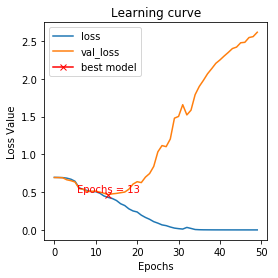

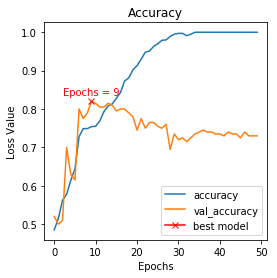

In [94]:
import matplotlib.pyplot as plt
#Loss
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
         np.min(clf_hist.history["val_loss"]),
         marker="x", color="r", label="best model")
plt.annotate('Epochs = ' + str(np.argmin(clf_hist.history["val_loss"])), 
             xy = (np.argmin(clf_hist.history["val_loss"]), np.min(clf_hist.history["val_loss"]) + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6A/loss_32base.png', dpi = 200)

#Accuracy
plt.figure(figsize=(4, 4))
plt.title("Accuracy")
plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
plt.plot( np.argmax(clf_hist.history["val_binary_accuracy"]),
         np.max(clf_hist.history["val_binary_accuracy"]),
         marker="x", color="r", label="best model")
plt.annotate('Epochs = ' + str(np.argmax(clf_hist.history["val_binary_accuracy"])), 
             xy = (np.argmax(clf_hist.history["val_binary_accuracy"]), np.max(clf_hist.history["val_binary_accuracy"]) + 0.01),
             horizontalalignment = "center", verticalalignment = "bottom", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();
plt.savefig('6A/acc_32base.png', dpi = 200)

### _Comments_
The model fit quite well the training model, because at the last iteration, the loss value is really close to 0. But the validation dataset is not well fitted and it is worse through the iterations, this shows a clear overfitting.

# Task 6B

In [95]:
def model_dropout(img_ch, img_width, img_height, n_base):
    model = Sequential()
    
    model.add(Conv2D(filters=n_base, input_shape=(img_width, img_height, img_ch),kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters= n_base *2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0,4))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_134 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_135 (Activation)  (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 32, 32, 32)      

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3156 - binary_accuracy: 0.8700 - val_loss: 0.5171 - val_binary_accuracy: 0.7700
Epoch 34/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3247 - binary_accuracy: 0.8550 - val_loss: 0.4555 - val_binary_accuracy: 0.8050
Epoch 35/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2969 - binary_accuracy: 0.8870 - val_loss: 0.4895 - val_binary_accuracy: 0.8000
Epoch 36/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3171 - binary_accuracy: 0.8610 - val_loss: 0.4572 - val_binary_accuracy: 0.8000
Epoch 37/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2830 - binary_accuracy: 0.8880 - val_loss: 0.4962 - val_binary_accuracy: 0.7900
Epoch 38/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.2718 - binary_accuracy: 0.8880 - val_loss: 0.5211 - val_binary_accuracy: 0.7750
Epoch 39/50
1000/1000 [=======================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4389 - binary_accuracy: 0.8000 - val_loss: 0.5289 - val_binary_accuracy: 0.7750
Epoch 16/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4374 - binary_accuracy: 0.8010 - val_loss: 0.4815 - val_binary_accuracy: 0.7900
Epoch 17/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4125 - binary_accuracy: 0.8190 - val_loss: 0.4624 - val_binary_accuracy: 0.8300
Epoch 18/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4107 - binary_accuracy: 0.8260 - val_loss: 0.4575 - val_binary_accuracy: 0.8200
Epoch 19/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3761 - binary_accuracy: 0.8260 - val_loss: 0.4546 - val_binary_accuracy: 0.8100
Epoch 20/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3873 - binary_accuracy: 0.8280 - val_loss: 0.4787 - val_binary_accuracy: 0.8050
Epoch 21/50
1000/1000 [=======================

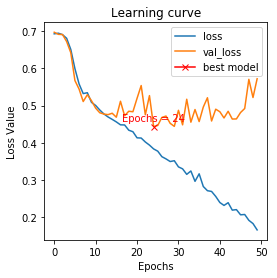

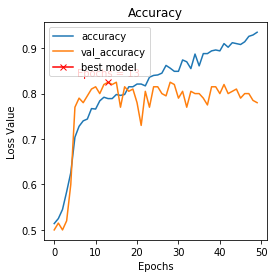

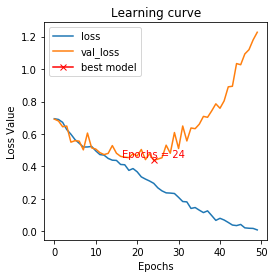

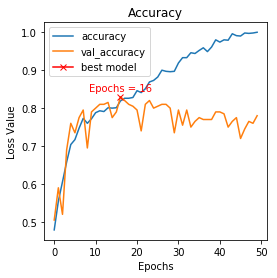

In [96]:
# Without dropout

img_w, img_h = 128, 128
n_epochs = 50
batchsize = 8
LR = 0.0001

for base in [8,16]:
    #Building the models
    clf = model(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
    #Plotting curves
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    plt.plot( np.argmin(clf_hist.history["val_loss"]),
             np.min(clf_hist.history["val_loss"]),
             marker="x", color="r", label="best model")
    plt.annotate('Epochs = ' + str(np.argmin(clf_hist.history["val_loss"])), 
                 xy = (np.argmin(clf_hist.history["val_loss"]), np.min(clf_hist.history["val_loss"]) + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6B/loss_'+str(base)+'.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    plt.plot( np.argmax(clf_hist.history["val_binary_accuracy"]),
             np.max(clf_hist.history["val_binary_accuracy"]),
             marker="x", color="r", label="best model")
    plt.annotate('Epochs = ' + str(np.argmax(clf_hist.history["val_binary_accuracy"])), 
                 xy = (np.argmax(clf_hist.history["val_binary_accuracy"]), np.max(clf_hist.history["val_binary_accuracy"]) + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6B/acc_'+str(base)+'.png', dpi = 200)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_150 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_151 (Activation)  (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 32, 32, 32)      

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4018 - binary_accuracy: 0.8300 - val_loss: 0.4378 - val_binary_accuracy: 0.8100
Epoch 32/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3923 - binary_accuracy: 0.8330 - val_loss: 0.4497 - val_binary_accuracy: 0.8150
Epoch 33/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3839 - binary_accuracy: 0.8390 - val_loss: 0.4554 - val_binary_accuracy: 0.8050
Epoch 34/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3826 - binary_accuracy: 0.8410 - val_loss: 0.4356 - val_binary_accuracy: 0.8100
Epoch 35/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3835 - binary_accuracy: 0.8330 - val_loss: 0.4945 - val_binary_accuracy: 0.7600
Epoch 36/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3586 - binary_accuracy: 0.8390 - val_loss: 0.4579 - val_binary_accuracy: 0.8300
Epoch 37/50
1000/1000 [=======================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5311 - binary_accuracy: 0.7530 - val_loss: 0.5145 - val_binary_accuracy: 0.8000
Epoch 12/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5307 - binary_accuracy: 0.7590 - val_loss: 0.4865 - val_binary_accuracy: 0.7900
Epoch 13/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5123 - binary_accuracy: 0.7630 - val_loss: 0.4758 - val_binary_accuracy: 0.8050
Epoch 14/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5000 - binary_accuracy: 0.7810 - val_loss: 0.4657 - val_binary_accuracy: 0.8000
Epoch 15/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5016 - binary_accuracy: 0.7800 - val_loss: 0.4885 - val_binary_accuracy: 0.7900
Epoch 16/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5014 - binary_accuracy: 0.7690 - val_loss: 0.4736 - val_binary_accuracy: 0.8000
Epoch 17/150
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1291 - binary_accuracy: 0.9490 - val_loss: 0.6134 - val_binary_accuracy: 0.7850
Epoch 62/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1047 - binary_accuracy: 0.9600 - val_loss: 0.6558 - val_binary_accuracy: 0.7850
Epoch 63/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1061 - binary_accuracy: 0.9620 - val_loss: 0.7447 - val_binary_accuracy: 0.7650
Epoch 64/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0993 - binary_accuracy: 0.9660 - val_loss: 0.7110 - val_binary_accuracy: 0.7900
Epoch 65/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1102 - binary_accuracy: 0.9580 - val_loss: 0.7193 - val_binary_accuracy: 0.7750
Epoch 66/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0974 - binary_accuracy: 0.9620 - val_loss: 0.7609 - val_binary_accuracy: 0.7500
Epoch 67/150
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0143 - binary_accuracy: 0.9970 - val_loss: 1.3797 - val_binary_accuracy: 0.7850
Epoch 112/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0117 - binary_accuracy: 0.9960 - val_loss: 1.5125 - val_binary_accuracy: 0.7800
Epoch 113/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0239 - binary_accuracy: 0.9920 - val_loss: 1.1669 - val_binary_accuracy: 0.7950
Epoch 114/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0244 - binary_accuracy: 0.9900 - val_loss: 1.2831 - val_binary_accuracy: 0.7950
Epoch 115/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0111 - binary_accuracy: 0.9990 - val_loss: 1.3152 - val_binary_accuracy: 0.8000
Epoch 116/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0082 - binary_accuracy: 0.9980 - val_loss: 1.2471 - val_binary_accuracy: 0.7900
Epoch 117/150
1000/1000 [===========

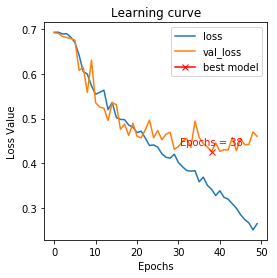

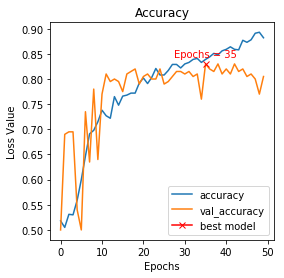

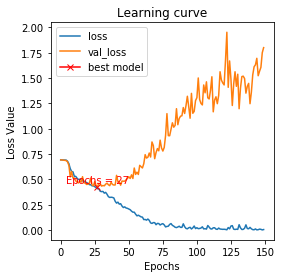

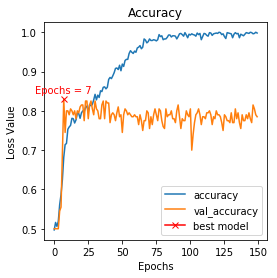

In [97]:
# With dropout

img_w, img_h = 128, 128
batchsize = 8
LR = 0.0001
base = 8

for n_epochs in [50, 150]:
    #Building the models
    clf = model_dropout(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
    #Plotting curves
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    plt.plot( np.argmin(clf_hist.history["val_loss"]),
             np.min(clf_hist.history["val_loss"]),
             marker="x", color="r", label="best model")
    plt.annotate('Epochs = ' + str(np.argmin(clf_hist.history["val_loss"])), 
                 xy = (np.argmin(clf_hist.history["val_loss"]), np.min(clf_hist.history["val_loss"]) + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6B/loss_'+str(n_epochs)+'_with_dropout.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    plt.plot( np.argmax(clf_hist.history["val_binary_accuracy"]),
             np.max(clf_hist.history["val_binary_accuracy"]),
             marker="x", color="r", label="best model")
    plt.annotate('Epochs = ' + str(np.argmax(clf_hist.history["val_binary_accuracy"])), 
                 xy = (np.argmax(clf_hist.history["val_binary_accuracy"]), np.max(clf_hist.history["val_binary_accuracy"]) + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6B/acc_'+str(n_epochs)+'_with_dropout.png', dpi = 200)
    

### _Comments_
Reducing the n_base reduces the overfitting but does not cancel it. It is normal that it reduces it because there are less neuron and it will fit less the noise of the training dataset. 
As expected the dropout layer reduces also the overfitting, however it doesn't cancel it either. This reduce is expected because the drop out layer randomly delete some neurons in the dense layer, making the learning power of the network weaker and therefore it cannot fit too well the training dataset.

# Tak 6C

In [109]:
img_w, img_h = 128, 128
base = 8
batchsize = 8
LR = 1e-5
for n_epochs in [150, 350]:
    #Building the models
    clf = model(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
    #Plotting curves
    #Loss
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    xmin = np.argmin(clf_hist.history["val_loss"])
    ymin = np.min(clf_hist.history["val_loss"])
    plt.plot(xmin, ymin, marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmin), + ', ' + str(ymin) + ')', 
                 xy = (xmin, ymin) - 0.01),
                 horizontalalignment = "center", verticalalignment = "top", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6C/loss_'+str(n_epochs)+'.png', dpi = 200)

    #Accuracy
    plt.figure(figsize=(4, 4))
    plt.title("Accuracy")
    plt.plot(clf_hist.history["binary_accuracy"], label="accuracy")
    plt.plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
    xmax = np.argmax(clf_hist.history["val_binary_accuracy"])
    ymax = np.max(clf_hist.history["val_binary_accuracy"])
    plt.plot(xmax, ymax,
             marker="x", color="r", label="best model")
    plt.annotate('(' + str(xmax), + ', ' + str(ymax) + ')', 
                 xy = (xmax, ymax) + 0.01),
                 horizontalalignment = "center", verticalalignment = "bottom", color = "red")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6C/acc_'+str(n_epochs)+'.png', dpi = 200)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 36)

### _Comments_
blabla

# Task 6D

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_102 (Activation)  (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_103 (Activation)  (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 32)      

Epoch 33/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.5068 - binary_accuracy: 0.7580 - val_loss: 0.5061 - val_binary_accuracy: 0.7700
Epoch 34/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.5046 - binary_accuracy: 0.7690 - val_loss: 0.4945 - val_binary_accuracy: 0.8050
Epoch 35/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.5001 - binary_accuracy: 0.7560 - val_loss: 0.5142 - val_binary_accuracy: 0.7900
Epoch 36/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.5055 - binary_accuracy: 0.7620 - val_loss: 0.4890 - val_binary_accuracy: 0.8200
Epoch 37/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.5022 - binary_accuracy: 0.7740 - val_loss: 0.4912 - val_binary_accuracy: 0.8100
Epoch 38/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.4960 - binary_accuracy: 0.7650 - val_loss: 0.4937 - val_binary_accuracy: 0.8100
Epoch 39/150
1000/1000 [====

1000/1000 [==============================] - 5s 5ms/sample - loss: 0.4321 - binary_accuracy: 0.8110 - val_loss: 0.4677 - val_binary_accuracy: 0.8050
Epoch 84/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.4355 - binary_accuracy: 0.8010 - val_loss: 0.4533 - val_binary_accuracy: 0.8300
Epoch 85/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.4276 - binary_accuracy: 0.8170 - val_loss: 0.4507 - val_binary_accuracy: 0.8350
Epoch 86/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.4259 - binary_accuracy: 0.8060 - val_loss: 0.4715 - val_binary_accuracy: 0.8250
Epoch 87/150
1000/1000 [==============================] - 4s 4ms/sample - loss: 0.4257 - binary_accuracy: 0.8180 - val_loss: 0.4514 - val_binary_accuracy: 0.8300
Epoch 88/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.4316 - binary_accuracy: 0.8150 - val_loss: 0.4587 - val_binary_accuracy: 0.8150
Epoch 89/150
1000/1000 [=================

1000/1000 [==============================] - 5s 5ms/sample - loss: 0.3598 - binary_accuracy: 0.8420 - val_loss: 0.4545 - val_binary_accuracy: 0.8400
Epoch 134/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.3533 - binary_accuracy: 0.8450 - val_loss: 0.4399 - val_binary_accuracy: 0.8400
Epoch 135/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.3486 - binary_accuracy: 0.8440 - val_loss: 0.4452 - val_binary_accuracy: 0.8250
Epoch 136/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.3485 - binary_accuracy: 0.8560 - val_loss: 0.4466 - val_binary_accuracy: 0.8200
Epoch 137/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.3445 - binary_accuracy: 0.8600 - val_loss: 0.4410 - val_binary_accuracy: 0.8300
Epoch 138/150
1000/1000 [==============================] - 5s 5ms/sample - loss: 0.3396 - binary_accuracy: 0.8580 - val_loss: 0.4534 - val_binary_accuracy: 0.8250
Epoch 139/150
1000/1000 [===========

Epoch 15/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6238 - binary_accuracy: 0.7120 - val_loss: 0.6251 - val_binary_accuracy: 0.7550
Epoch 16/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6198 - binary_accuracy: 0.6930 - val_loss: 0.6284 - val_binary_accuracy: 0.6950
Epoch 17/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6130 - binary_accuracy: 0.7040 - val_loss: 0.6116 - val_binary_accuracy: 0.7350
Epoch 18/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6043 - binary_accuracy: 0.6940 - val_loss: 0.6099 - val_binary_accuracy: 0.7050
Epoch 19/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5987 - binary_accuracy: 0.6940 - val_loss: 0.5985 - val_binary_accuracy: 0.7400
Epoch 20/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5896 - binary_accuracy: 0.7190 - val_loss: 0.5946 - val_binary_accuracy: 0.7900
Epoch 21/150
1000/1000 [====

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4968 - binary_accuracy: 0.7670 - val_loss: 0.5015 - val_binary_accuracy: 0.8050
Epoch 66/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5039 - binary_accuracy: 0.7670 - val_loss: 0.4973 - val_binary_accuracy: 0.7950
Epoch 67/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5003 - binary_accuracy: 0.7690 - val_loss: 0.4926 - val_binary_accuracy: 0.8050
Epoch 68/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4980 - binary_accuracy: 0.7730 - val_loss: 0.4925 - val_binary_accuracy: 0.7950
Epoch 69/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4915 - binary_accuracy: 0.7670 - val_loss: 0.5186 - val_binary_accuracy: 0.7900
Epoch 70/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4935 - binary_accuracy: 0.7770 - val_loss: 0.4895 - val_binary_accuracy: 0.7900
Epoch 71/150
1000/1000 [=================

1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4546 - binary_accuracy: 0.7980 - val_loss: 0.4727 - val_binary_accuracy: 0.8000
Epoch 116/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4511 - binary_accuracy: 0.8030 - val_loss: 0.4725 - val_binary_accuracy: 0.8050
Epoch 117/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4479 - binary_accuracy: 0.8000 - val_loss: 0.4723 - val_binary_accuracy: 0.7950
Epoch 118/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4475 - binary_accuracy: 0.8020 - val_loss: 0.4729 - val_binary_accuracy: 0.7950
Epoch 119/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4470 - binary_accuracy: 0.8050 - val_loss: 0.4717 - val_binary_accuracy: 0.8150
Epoch 120/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4463 - binary_accuracy: 0.8050 - val_loss: 0.4843 - val_binary_accuracy: 0.7900
Epoch 121/150
1000/1000 [===========

Epoch 1/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6931 - binary_accuracy: 0.4980 - val_loss: 0.6925 - val_binary_accuracy: 0.5000
Epoch 2/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6924 - binary_accuracy: 0.5620 - val_loss: 0.6919 - val_binary_accuracy: 0.5000
Epoch 3/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6918 - binary_accuracy: 0.4960 - val_loss: 0.6910 - val_binary_accuracy: 0.5000
Epoch 4/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6913 - binary_accuracy: 0.5260 - val_loss: 0.6904 - val_binary_accuracy: 0.5050
Epoch 5/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6903 - binary_accuracy: 0.5100 - val_loss: 0.6895 - val_binary_accuracy: 0.6450
Epoch 6/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6890 - binary_accuracy: 0.6430 - val_loss: 0.6881 - val_binary_accuracy: 0.5750
Epoch 7/150
1000/1000 [===========

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5288 - binary_accuracy: 0.7460 - val_loss: 0.5346 - val_binary_accuracy: 0.7850
Epoch 52/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5290 - binary_accuracy: 0.7650 - val_loss: 0.5343 - val_binary_accuracy: 0.7800
Epoch 53/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5207 - binary_accuracy: 0.7500 - val_loss: 0.5794 - val_binary_accuracy: 0.7300
Epoch 54/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5268 - binary_accuracy: 0.7470 - val_loss: 0.5316 - val_binary_accuracy: 0.7600
Epoch 55/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5238 - binary_accuracy: 0.7610 - val_loss: 0.5300 - val_binary_accuracy: 0.7900
Epoch 56/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5202 - binary_accuracy: 0.7540 - val_loss: 0.5278 - val_binary_accuracy: 0.7650
Epoch 57/150
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4855 - binary_accuracy: 0.7760 - val_loss: 0.4985 - val_binary_accuracy: 0.7850
Epoch 102/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4905 - binary_accuracy: 0.7740 - val_loss: 0.5001 - val_binary_accuracy: 0.7950
Epoch 103/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4942 - binary_accuracy: 0.7660 - val_loss: 0.5277 - val_binary_accuracy: 0.7900
Epoch 104/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4847 - binary_accuracy: 0.7770 - val_loss: 0.4984 - val_binary_accuracy: 0.7900
Epoch 105/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4824 - binary_accuracy: 0.7770 - val_loss: 0.5012 - val_binary_accuracy: 0.7900
Epoch 106/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4825 - binary_accuracy: 0.7740 - val_loss: 0.5178 - val_binary_accuracy: 0.7700
Epoch 107/150
1000/1000 [===========

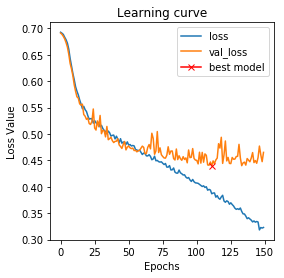

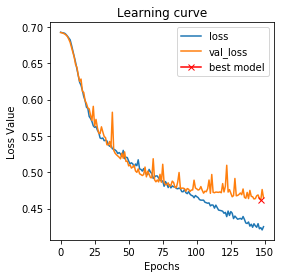

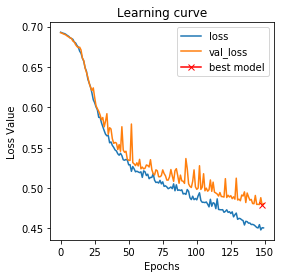

In [74]:
img_w, img_h = 128, 128
base = 8
n_epochs = 150
LR = 1e-5
for batchsize in [2,4,8]:
    #Building the model
    clf = model(1, img_w, img_h, base)
    clf.compile(loss='binary_crossentropy', optimizer = Adam(lr = LR), metrics=['binary_accuracy'])
    clf_hist = clf.fit(x_train, y_train, epochs = n_epochs, batch_size = batchsize, validation_data=(x_test, y_test))
    
    #Saving learning curve
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(clf_hist.history["loss"], label="loss")
    plt.plot(clf_hist.history["val_loss"], label="val_loss")
    plt.plot( np.argmin(clf_hist.history["val_loss"]),
             np.min(clf_hist.history["val_loss"]),
             marker="x", color="r", label="best model")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend();
    plt.savefig('6D/batchsize_'+str(batchsize)+'.png', dpi = 200)

# Task 6E

In [ ]:
img_w, img_h = 128, 128
base = 8
batchsize = 8
n_epochs = 150
for LR in [1e-3, 1e-4, 1e-5]